In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from scikitplot.metrics import plot_roc

from varclushi import VarClusHi
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf

from functools import reduce

cf.go_offline()
pd.set_option('display.max_columns',None)

## Carga de datos

In [ ]:
datos = pd.read_excel('encuesta.xlsx')
datos.shape

(2098, 36)

In [ ]:
datos['y']=(datos['¿A qué carrera ingresaste?']=='Matemáticas Aplicadas y Computación').astype(int)

In [ ]:
datos['ID'] = datos.index+1

In [ ]:
datos['y'].value_counts(1)

0    0.86511
1    0.13489
Name: y, dtype: float64

In [ ]:
vard = ['Esta carrera ¿Fue tu primera opción?', 'Selecciona tu sexo 👤',
        '¿Cuál es tu situación sentimental? ❤️',
        '¿De qué bachillerato provienes?',
        '¿La FES Acatlán fue tu primera opción para cursar esta carrera?',
        '¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?',
        '¿Tienes hijos? 🍼', '¿Trabajas? 💼'
        ]
varc = ['Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad',
        'Si tuvieras que volver a clases presenciales ¿Cuánto tiempo tardarías en minutos en llegar a la FES Acatlán? ⏱',
        '¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?',
        '¿Cuántas computadoras hay en tu casa?',
        '¿Cuántas personas viven contigo?',
        '¿Cuánto gastarías de pasaje / gasolina a la semana?',
        '¿Cuántos años tienes? 🎂',
        '¿Qué promedio obtuviste en el bachillerato?',
        '¿Qué tanto evitaste que tu carrera tuviera matemáticas?'
        ]
vart = ['y']
um = ['ID']


In [ ]:
datos = datos[um+vart+varc+vard]

In [ ]:
datos.head()

,ID,y,Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad,Si tuvieras que volver a clases presenciales ¿Cuánto tiempo tardarías en minutos en llegar a la FES Acatlán? ⏱,¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?,¿Cuántas computadoras hay en tu casa?,¿Cuántas personas viven contigo?,¿Cuánto gastarías de pasaje / gasolina a la semana?,¿Cuántos años tienes? 🎂,¿Qué promedio obtuviste en el bachillerato?,¿Qué tanto evitaste que tu carrera tuviera matemáticas?,Esta carrera ¿Fue tu primera opción?,Selecciona tu sexo 👤,¿Cuál es tu situación sentimental? ❤️,¿De qué bachillerato provienes?,¿La FES Acatlán fue tu primera opción para cursar esta carrera?,¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?,¿Tienes hijos? 🍼,¿Trabajas? 💼
0,1,0,122.00,40.0,18000,3,3,120.0,17,9.00,1,Si,Hombre,Soltero,CCH,Sí,Windows,No,Si
1,2,0,12.19,100.0,30000,5,5,60.0,19,8.84,1,Si,Hombre,Soltero,Otro,Sí,Windows,No,No
2,3,0,30.85,0.0,10000,2,6,0.0,22,7.00,2,Si,Hombre,Soltero,Otro,Sí,Windows,No,Si
3,4,0,4.91,91.0,8000,2,5,150.0,17,9.49,1,Si,Mujer,Soltero,CCH,Sí,Windows,No,No
4,5,0,11.97,120.0,4000,1,4,300.0,17,8.70,1,Si,Mujer,Tengo pareja,CCH,Sí,Windows,No,Si


In [ ]:
train, valid = train_test_split(datos,train_size=0.7)
train.reset_index(drop=True,inplace=True),valid.reset_index(drop=True,inplace=True)
train.shape,valid.shape

((1468, 19), (630, 19))

## Análisis Exploratorio de datos

### Reducción de dimensiones

#### Multicolinealidad

In [ ]:
vc = VarClusHi(df=train,feat_list=varc).varclus()

In [ ]:
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,¿A cuánto asciende el ingreso mensual neto de ...,0.667373,0.006320,0.334743
1,0,¿Cuántas computadoras hay en tu casa?,0.667373,0.007329,0.335083
2,1,¿Cuántos años tienes? 🎂,0.613510,0.022084,0.395218
3,1,¿Qué promedio obtuviste en el bachillerato?,0.613510,0.014539,0.392192
4,2,¿Cuántas personas viven contigo?,0.510860,0.001588,0.489918
5,2,¿Cuánto gastarías de pasaje / gasolina a la se...,0.510860,0.003932,0.491071
6,3,Si tuvieras que volver a clases presenciales ¿...,0.524876,0.015358,0.482534
7,3,¿Qué tanto evitaste que tu carrera tuviera mat...,0.524876,0.001226,0.475707
8,4,Hazle un test a tu Internet (ingresando a spee...,1.000000,0.000995,0.000000


In [ ]:
var = list(vc.rsquare.sort_values(by=['Cluster','RS_Ratio']).groupby('Cluster').first()['Variable'])

In [ ]:
len(var)

5

### Análisis Univariado

#### Continuo

##### Distribución

array([[<Axes: title={'center': '¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?'}>,
        <Axes: title={'center': '¿Qué promedio obtuviste en el bachillerato?'}>],
       [<Axes: title={'center': '¿Cuántas personas viven contigo?'}>,
        <Axes: title={'center': '¿Qué tanto evitaste que tu carrera tuviera matemáticas?'}>],
       [<Axes: title={'center': 'Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad'}>,
        <Axes: >]], dtype=object)

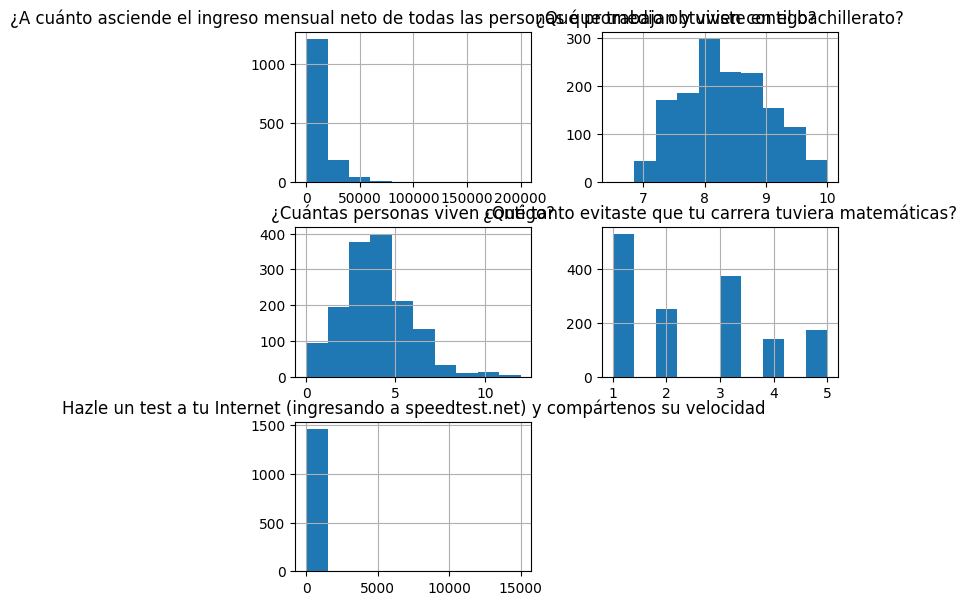

In [ ]:
train[var].hist(figsize=(7,7))

##### Ausentes

In [ ]:
(train[var].isna().sum()/len(train)).to_frame()

,0
¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?,0.0
¿Qué promedio obtuviste en el bachillerato?,0.0
¿Cuántas personas viven contigo?,0.0
¿Qué tanto evitaste que tu carrera tuviera matemáticas?,0.0
Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad,0.0


##### Extremos

In [ ]:
for v,li,ls in train[var].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    train[f'ex_{v}'] = ((train[v]<li)|(train[v]>ls)).astype(int)

In [ ]:
train['ex_'] = train.filter(like='ex_').max(axis=1)

In [ ]:
train['ex_'].value_counts(1)

0    0.952997
1    0.047003
Name: ex_, dtype: float64

In [ ]:
train = train[train['ex_']==0].reset_index(drop=True)

In [ ]:
train.drop(train.filter(like='ex_').columns,axis=1,inplace=True)

array([[<Axes: title={'center': '¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?'}>,
        <Axes: title={'center': '¿Qué promedio obtuviste en el bachillerato?'}>],
       [<Axes: title={'center': '¿Cuántas personas viven contigo?'}>,
        <Axes: title={'center': '¿Qué tanto evitaste que tu carrera tuviera matemáticas?'}>],
       [<Axes: title={'center': 'Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad'}>,
        <Axes: >]], dtype=object)

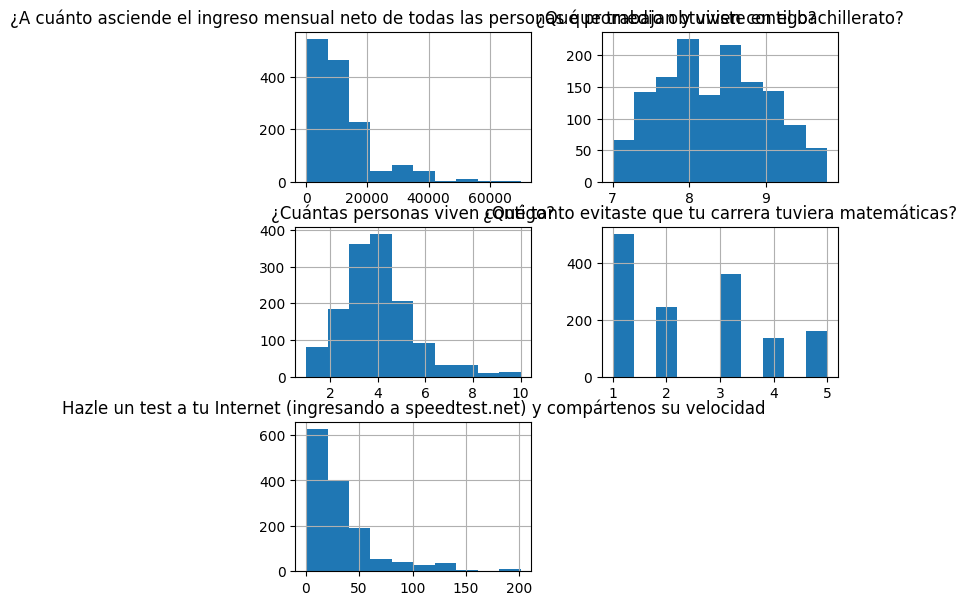

In [ ]:
train[var].hist(figsize=(7,7))

In [ ]:
train[var].describe(percentiles=[0.01,0.05,0.95,0.99])

,¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?,¿Qué promedio obtuviste en el bachillerato?,¿Cuántas personas viven contigo?,¿Qué tanto evitaste que tu carrera tuviera matemáticas?,Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,11497.807005,8.319614,3.829164,2.437455,33.375461
std,10400.837783,0.670590,1.651758,1.358036,33.605454
min,0.000000,7.000000,1.000000,1.000000,0.340000
1%,0.000000,7.000000,1.000000,1.000000,0.989000
5%,1590.000000,7.300000,1.000000,1.000000,2.934000
50%,8000.000000,8.300000,4.000000,2.000000,22.560000
95%,30000.000000,9.500000,7.000000,5.000000,110.190000
99%,50000.000000,9.760800,9.000000,5.000000,160.694000
max,70000.000000,9.800000,10.000000,5.000000,201.130000


#### Discreto

##### Análisis de frecuencia

In [ ]:
def freq(data:pd.DataFrame,variables:list):
    if type(variables) is not list:
        variables = [variables]
    for v in variables:
        aux = data[v].value_counts().to_frame()
        aux.rename(columns={v:'FA'},inplace=True)
        aux['FR'] = aux['FA']/aux['FA'].sum()
        aux[['FAA','FRA']] = aux.cumsum()
        print(f"Tabla de frecuencias de la variable **{v}**\n\n")
        print(aux)
        print("\n")

In [ ]:
freq(train,vard)

Tabla de frecuencias de la variable **Esta carrera ¿Fue tu primera opción?**


      FA        FR   FAA       FRA
Si  1160  0.829164  1160  0.829164
No   239  0.170836  1399  1.000000


Tabla de frecuencias de la variable **Selecciona tu sexo 👤**


         FA        FR   FAA       FRA
Hombre  765  0.546819   765  0.546819
Mujer   634  0.453181  1399  1.000000


Tabla de frecuencias de la variable **¿Cuál es tu situación sentimental? ❤️**


                FA        FR   FAA       FRA
Soltero       1036  0.740529  1036  0.740529
Tengo pareja   363  0.259471  1399  1.000000


Tabla de frecuencias de la variable **¿De qué bachillerato provienes?**


             FA        FR   FAA       FRA
CCH         719  0.513939   719  0.513939
Otro        424  0.303074  1143  0.817012
Prepa UNAM  256  0.182988  1399  1.000000


Tabla de frecuencias de la variable **¿La FES Acatlán fue tu primera opción para cursar esta carrera?**


      FA        FR   FAA       FRA
Sí  1134  0.810579  1134  0.81057

##### Normalización

In [ ]:
def normalizar(df:pd.DataFrame,var:str,umbral:float=0.05)->tuple:
    """Esta función normaliza una variable discreta basada en el 
    principio de umbral de representatividad estadística.

    Args:
        df (pd.DataFrame): datos con v.d. a normalizar
        var (str): nombre de la variable
        umbral (float, optional): umbral estadístico deseado. Defaults to 0.05.

    Returns:
        tuple: nombre de la variable y mapa de normalización
    """
    aux = df[var].value_counts(1).to_frame()
    aux['map'] = np.where(aux[var]<umbral,'Otros',aux.index)
    if aux.loc[aux['map']=='Otros'][var].sum()<umbral:
        aux['map'].replace({'Otros':aux.head(1)['map'].values[0]},inplace=True)
    aux.drop(var,axis=1,inplace=True)
    return var,aux['map'].to_dict()

In [ ]:
vard

['Esta carrera ¿Fue tu primera opción?',
 'Selecciona tu sexo 👤',
 '¿Cuál es tu situación sentimental? ❤️',
 '¿De qué bachillerato provienes?',
 '¿La FES Acatlán fue tu primera opción para cursar esta carrera?',
 '¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?',
 '¿Tienes hijos? 🍼',
 '¿Trabajas? 💼']

In [ ]:
mapa_norm = list(map(lambda v:normalizar(train,v),vard))

In [ ]:
for v, mapa in mapa_norm:
    train[f'n_{v}'] = train[v].replace(mapa)

In [ ]:
varn = [v for v in train.columns if v[:2]=='n_']

In [ ]:
freq(train,varn)

Tabla de frecuencias de la variable **n_Esta carrera ¿Fue tu primera opción?**


      FA        FR   FAA       FRA
Si  1160  0.829164  1160  0.829164
No   239  0.170836  1399  1.000000


Tabla de frecuencias de la variable **n_Selecciona tu sexo 👤**


         FA        FR   FAA       FRA
Hombre  765  0.546819   765  0.546819
Mujer   634  0.453181  1399  1.000000


Tabla de frecuencias de la variable **n_¿Cuál es tu situación sentimental? ❤️**


                FA        FR   FAA       FRA
Soltero       1036  0.740529  1036  0.740529
Tengo pareja   363  0.259471  1399  1.000000


Tabla de frecuencias de la variable **n_¿De qué bachillerato provienes?**


             FA        FR   FAA       FRA
CCH         719  0.513939   719  0.513939
Otro        424  0.303074  1143  0.817012
Prepa UNAM  256  0.182988  1399  1.000000


Tabla de frecuencias de la variable **n_¿La FES Acatlán fue tu primera opción para cursar esta carrera?**


      FA        FR   FAA       FRA
Sí  1134  0.810579  113

##### Quitar unarias (sin varianza)

In [ ]:
unarias = [v for v in varn if train[v].nunique()==1]

In [ ]:
unarias

['n_¿Tienes hijos? 🍼']

In [ ]:
varn = [v for v in varn if v not in unarias]

In [ ]:
train.drop(unarias,axis=1,inplace=True)

In [ ]:
len(varn)

7

## Representación Vectorial

In [ ]:
oh = OneHotEncoder(drop='if_binary',sparse_output=False)

In [ ]:
oh.fit(train[varn])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [ ]:
var_dummy = list(oh.get_feature_names_out())

In [ ]:
train[var_dummy] = oh.transform(train[varn])

In [ ]:
train.head()

,ID,y,Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad,Si tuvieras que volver a clases presenciales ¿Cuánto tiempo tardarías en minutos en llegar a la FES Acatlán? ⏱,¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?,¿Cuántas computadoras hay en tu casa?,¿Cuántas personas viven contigo?,¿Cuánto gastarías de pasaje / gasolina a la semana?,¿Cuántos años tienes? 🎂,¿Qué promedio obtuviste en el bachillerato?,¿Qué tanto evitaste que tu carrera tuviera matemáticas?,Esta carrera ¿Fue tu primera opción?,Selecciona tu sexo 👤,¿Cuál es tu situación sentimental? ❤️,¿De qué bachillerato provienes?,¿La FES Acatlán fue tu primera opción para cursar esta carrera?,¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?,¿Tienes hijos? 🍼,¿Trabajas? 💼,n_Esta carrera ¿Fue tu primera opción?,n_Selecciona tu sexo 👤,n_¿Cuál es tu situación sentimental? ❤️,n_¿De qué bachillerato provienes?,n_¿La FES Acatlán fue tu primera opción para cursar esta carrera?,n_¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?,n_¿Trabajas? 💼,n_Esta carrera ¿Fue tu primera opción?_Si,n_Selecciona tu sexo 👤_Mujer,n_¿Cuál es tu situación sentimental? ❤️_Tengo pareja,n_¿De qué bachillerato provienes?_CCH,n_¿De qué bachillerato provienes?_Otro,n_¿De qué bachillerato provienes?_Prepa UNAM,n_¿La FES Acatlán fue tu primera opción para cursar esta carrera?_Sí,n_¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?_Windows,n_¿Trabajas? 💼_Si
0,100,0,29.96,60.0,36000,3,4,400.0,17,9.2,1,Si,Mujer,Soltero,CCH,Sí,Windows,No,No,Si,Mujer,Soltero,CCH,Sí,Windows,No,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1006,0,50.22,20.0,25000,3,4,100.0,18,8.3,4,Si,Hombre,Soltero,CCH,Sí,Windows,No,No,Si,Hombre,Soltero,CCH,Sí,Windows,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1687,0,30.31,100.0,4000,1,5,150.0,17,8.0,5,Si,Mujer,Soltero,CCH,Sí,Windows,No,No,Si,Mujer,Soltero,CCH,Sí,Windows,No,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1540,0,2.65,120.0,18000,1,5,500.0,20,7.6,1,Si,Hombre,Soltero,CCH,Sí,Windows,No,Si,Si,Hombre,Soltero,CCH,Sí,Windows,Si,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,1803,0,51.40,1.0,20000,1,4,200.0,18,8.5,3,Si,Hombre,Tengo pareja,CCH,Sí,Windows,No,Si,Si,Hombre,Tengo pareja,CCH,Sí,Windows,Si,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
len(var+var_dummy)

14

array([[<Axes: title={'center': '¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?'}>,
        <Axes: title={'center': '¿Qué promedio obtuviste en el bachillerato?'}>,
        <Axes: title={'center': '¿Cuántas personas viven contigo?'}>,
        <Axes: title={'center': '¿Qué tanto evitaste que tu carrera tuviera matemáticas?'}>],
       [<Axes: title={'center': 'Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad'}>,
        <Axes: title={'center': 'n_Esta carrera ¿Fue tu primera opción?_Si'}>,
        <Axes: title={'center': 'n_Selecciona tu sexo 👤_Mujer'}>,
        <Axes: title={'center': 'n_¿Cuál es tu situación sentimental? ❤️_Tengo pareja'}>],
       [<Axes: title={'center': 'n_¿De qué bachillerato provienes?_CCH'}>,
        <Axes: title={'center': 'n_¿De qué bachillerato provienes?_Otro'}>,
        <Axes: title={'center': 'n_¿De qué bachillerato provienes?_Prepa UNAM'}>,
        <Axes: title={'center': '

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from current font.



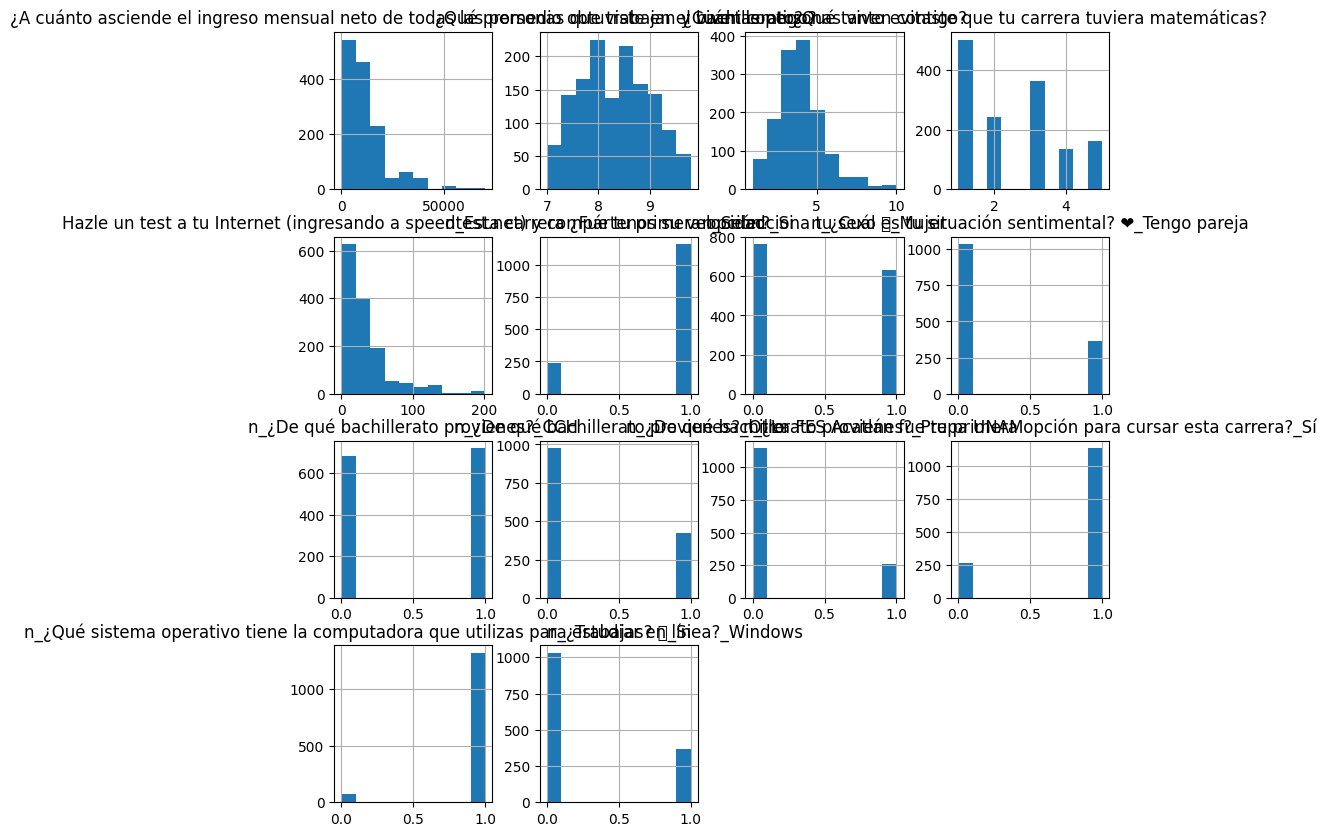

In [ ]:
train[var+var_dummy].hist(figsize=(10,10))

## Análisis de poder predictivo

In [ ]:
#sk = SelectKBest(k=len(var+var_dummy))
sk = SelectKBest(k=6)

In [ ]:
sk.fit(train[var+var_dummy],train['y'])

SelectKBest(k=6)

In [ ]:
pd.Series(dict(zip(sk.get_feature_names_out(),sk.scores_))).sort_values(ascending=False).iplot(kind='bar',color='purple')

In [ ]:
best = [v for v,d in zip(var+var_dummy,sk.get_support()) if d ]

In [ ]:
best

['¿Qué tanto evitaste que tu carrera tuviera matemáticas?',
 'n_Esta carrera ¿Fue tu primera opción?_Si',
 'n_Selecciona tu sexo 👤_Mujer',
 'n_¿De qué bachillerato provienes?_CCH',
 'n_¿De qué bachillerato provienes?_Otro',
 'n_¿Trabajas? 💼_Si']

/home/jose/entornos/tsc2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from current font.



/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.

/home/jose/entornos/tsc2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from current font.



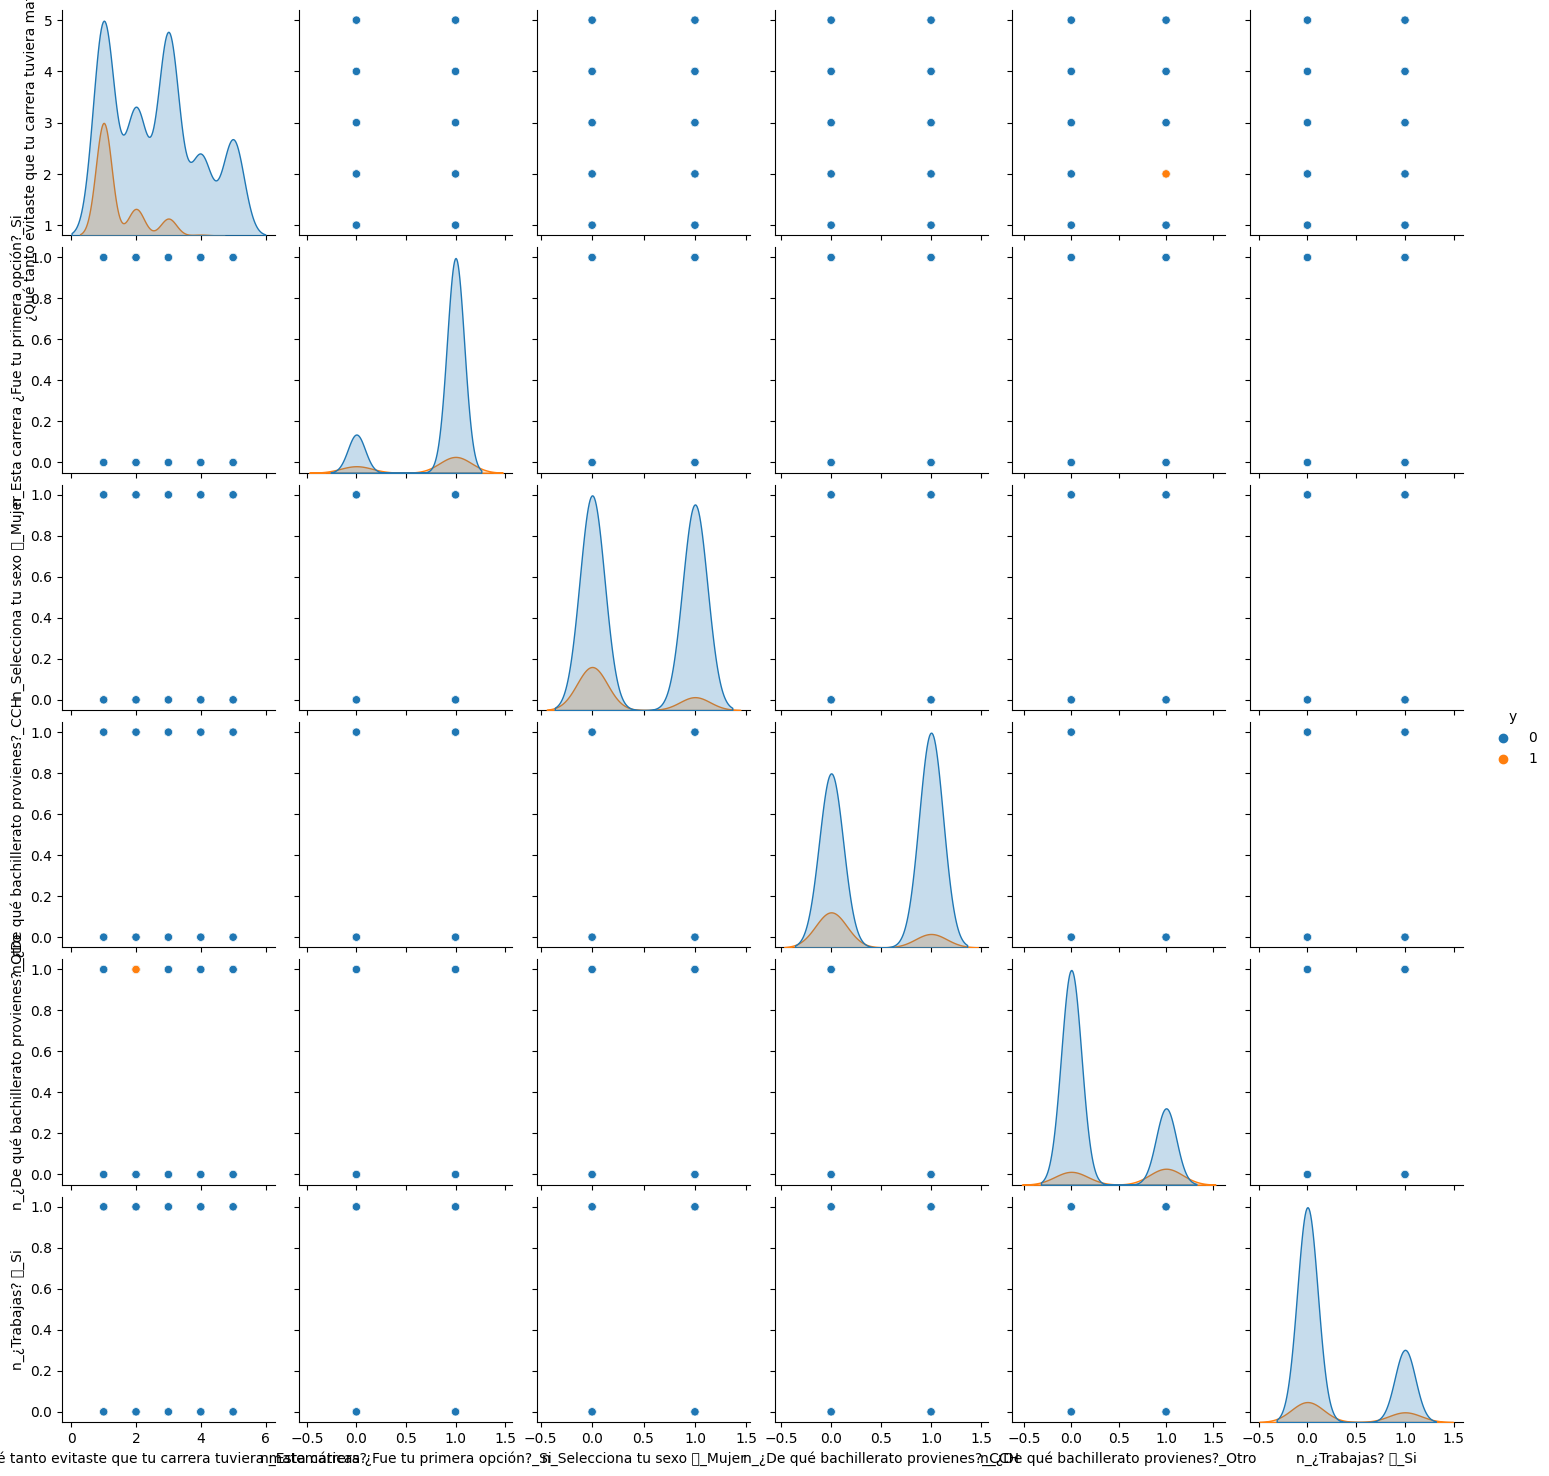

In [ ]:
sns.pairplot(data=train[best+['y']],hue='y')

## Aprendizaje

In [ ]:
lr = LogisticRegression()

### Híper-parametrización

In [ ]:
hiper_param = {'penalty':['l1', 'l2', 'elasticnet', None],'C':np.arange(0.1,2,0.1)}

In [ ]:
reduce(lambda x,y:x*y,map(len,hiper_param.values()))

76

In [ ]:
grid = GridSearchCV(param_grid=hiper_param, n_jobs=-1,
                    estimator=lr, cv=5, verbose=True, scoring='roc_auc')


In [ ]:
grid.fit(train[best],train['y'])

Fitting 5 folds for each of 76 candidates, totalling 380 fits


/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/lin

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='roc_auc', verbose=True)

In [ ]:
lr = grid.best_estimator_
lr

LogisticRegression(C=0.1, penalty=None)

In [ ]:
grid.best_score_

0.8326160584459339

### Parámetros $\vec{\theta},\theta_0$

In [ ]:
lr.fit(train[best],train['y'])

/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



LogisticRegression(C=0.1, penalty=None)

In [ ]:
lr.coef_,lr.intercept_

(array([[-0.97974324, -1.06378392, -0.84453237, -0.52197055,  0.95927488,
          0.1033446 ]]),
 array([0.93300699]))

### Métricas de ajuste

In [ ]:
for v, mapa in mapa_norm:
    valid[f'n_{v}'] = valid[v].replace(mapa)

In [ ]:
valid[var_dummy] = oh.transform(valid[varn])

In [ ]:
train['y^'] = lr.predict(train[best])
valid['y^'] = lr.predict(valid[best])

train['proba'] = lr.predict_proba(train[best])[:,1]
valid['proba'] = lr.predict_proba(valid[best])[:,1]

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

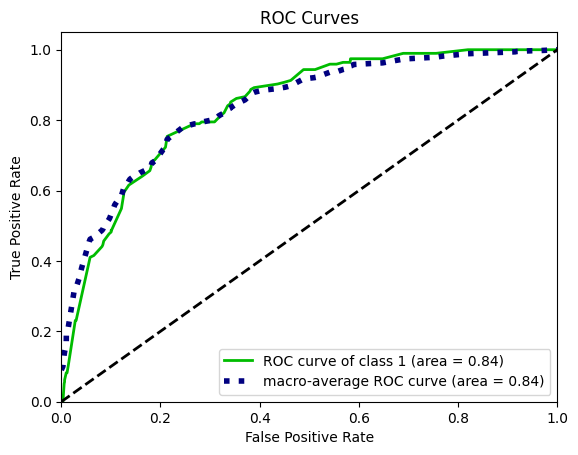

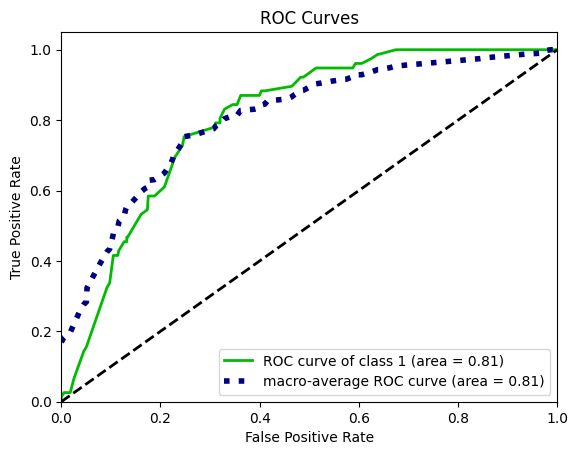

In [ ]:
plot_roc(y_probas=lr.predict_proba(
    train[best]), y_true=train['y'], plot_macro=True, plot_micro=False, classes_to_plot=[1])


plot_roc(y_probas=lr.predict_proba(
    valid[best]), y_true=valid['y'], plot_macro=True, plot_micro=False, classes_to_plot=[1])


In [ ]:
accuracy_score(y_true=valid['y'],y_pred=valid['proba']>0.4)

0.8365079365079365

In [ ]:
confusion_matrix(y_true=valid['y'],y_pred=valid['y^'])

array([[543,  10],
       [ 75,   2]])

In [ ]:
best

['¿Qué tanto evitaste que tu carrera tuviera matemáticas?',
 'n_Esta carrera ¿Fue tu primera opción?_Si',
 'n_Selecciona tu sexo 👤_Mujer',
 'n_¿De qué bachillerato provienes?_CCH',
 'n_¿De qué bachillerato provienes?_Otro',
 'n_¿Trabajas? 💼_Si']

In [ ]:
train[['¿Qué tanto evitaste que tu carrera tuviera matemáticas?','y']].groupby('y').mean()

,¿Qué tanto evitaste que tu carrera tuviera matemáticas?
y,
0,2.605482
1,1.400000


In [ ]:
lr.predict_proba(np.array([1,1,0,0,1,1]).reshape(1,-1))

/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.51197288, 0.48802712]])

In [ ]:
lr.predict_proba(np.array([1,1,1,1,0,0]).reshape(1,-1))

/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.92251527, 0.07748473]])

In [ ]:
lr.predict_proba(np.array([5,1,1,1,0,0]).reshape(1,-1))

/home/jose/entornos/tsc2/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.99833455, 0.00166545]])

/tmp/ipykernel_4980/2921524491.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='proba', ylabel='Density'>

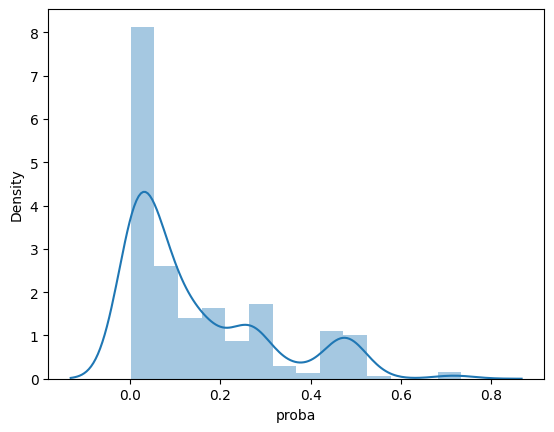

In [ ]:
sns.distplot(valid['proba'])